
# <font><b>MOVIELENS RECOMMENDATION SYSTEMS</b></font>




## <font color="#90EE90"><b>Collaborators</b></font>
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

![Movie.jpeg](Movie.jpeg)

# <font color=green><b>1. BUSINESS UNDERSTANDING</b></font> 

## <font color="#90EE90"><b>1.1 Overview</b></font>


In today’s data-driven world, recommendation systems are crucial for filtering information and enhancing user experiences. These systems help users discover relevant content by analyzing their past interactions, such as search queries or viewing histories.

Major platforms like Netflix and YouTube utilize recommendation algorithms to suggest movies and videos that cater to individual preferences, enhancing user engagement.

Aligned with our project objectives, we aim to leverage the power of data analysis to build an efficient movie recommendation system. Our goal is to deliver personalized movie suggestions by analyzing users’ previous movie ratings and interactions.

By doing so, the system will generate top 5 tailored movie recommendations for each user, improving their viewing experience and aligning with their unique preferences.

## <font color="#90EE90"><b>1.2 Problem Statement</b></font>

With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## <font color="#90EE90"><b>1.3 Objectives</b></font>


1. Develop a Personalized Recommendation System: Build a model that provides the top 5 movie recommendations to a user based on their ratings of other movies.

2. Implement Content-Based Filtering for Existing Users: Establish a content-based filtering mechanism for existing users, enabling them to input specific movie titles to receive similar movie suggestions.

3. Mitigate the Cold Start Problem by:

   - Promoting Movie Popularity: Recommend high-rated movies to new users lacking interaction history, regardless of genre.
   - Content-Based Filtering: Allow new users to select their preferred movie genre and receive the best movies within that genre.

4. Evaluate the Recommendation System Performance: Assess the effectiveness of the recommendation system using the Root Mean Square Error (RMSE) metric.

5. Analyze Movie Rating Frequency: Conduct an analysis of the MovieLens dataset to determine the average movie rating, aiming to understand user preferences.



## <font color="#90EE90"><b>1.4 Data Limitations</b></font>

While the MovieLens dataset is a valuable resource for developing a movie recommendation system, it does come with certain limitations some of which are:-

`Limited Temporal Coverage`: The dataset represents user interactions within a specific time period, which may not capture the latest shifts in movie trends or evolving audience preferences.

`Genre Imbalance`: While the dataset contains various movie genres, some genres may be underrepresented, which could limit the diversity of recommendations. Users with preferences for niche or less popular genres might not receive accurate suggestions tailored to their tastes.

`Cold-Start Problem`: The system may struggle with the cold-start problem, especially when dealing with new users or newly added movies that lack sufficient ratings or interaction data. This can hinder the system's ability to provide personalized and relevant recommendations in the absence of prior information.

`Potential Rating Bias`: User ratings can be influenced by factors like popularity bias (where users tend to rate popular movies higher) or external social dynamics. This can skew the system's predictions, leading to recommendations that do not fully reflect a user's authentic preferences.
.

 
# <font color=green><b>2.DATA UNDERSTANDING</b></font> 

## <font color="#90EE90"><b>2.1 Data Structure and Description</b></font> 

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

##### 1. `links.csv`
Contains identifiers linking MovieLens movies to external databases (IMDB and TMDb). The structure is structured as follows:


| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie in the MovieLens dataset    |
| `imdbId`  | Corresponding movie ID from IMDb                       |
| `tmdbId`  | Corresponding movie ID from The Movie Database (TMDb)  |



##### 2. `movies.csv`
This file includes movie titles and their associated genres. The data is structured as follows:

| Column    | Description                                                           |
|-----------|-----------------------------------------------------------------------|
| `movieId` | ID representing each movie                             |
| `title`   | Movie title, including the year of release (e.g., *Toy Story (1995)*) |
| `genres`  | Pipe-separated list of genres (e.g., *Animation|Children's|Comedy*)   |



##### 3. `ratings.csv`
This file contains explicit user ratings for movies on a **5-star scale**. The data is structured as:

| Column   | Description                                   |
|----------|-----------------------------------------------|
| `userId` | Anonymized ID representing each user          |
| `movieId`| ID representing each movie                    |
| `rating` | User rating for the movie (0.5 to 5.0 stars)  |
| `timestamp` | UNIX timestamp when the rating was made     |

Ratings are sorted first by `userId`, then by `movieId`.

##### 4. `tags.csv`
Tags represent user-generated metadata (e.g., short descriptions or labels). The structure is:

| Column   | Description                                    |
|----------|------------------------------------------------|
| `userId` | Anonymized ID representing each user           |
| `movieId`| ID representing each movie                     |
| `tag`    | User-assigned tag for the movie                |
| `timestamp` | UNIX timestamp when the tag was added       |

Like ratings, tags are sorted by `userId` and then by `movieId`


  

## <font color="#90EE90"><b>2.2 Data Loading and Inspection </b></font> 


Our first step is to import the libraries required for viewing the dataset. 

Instead of importing all libraries simultaneously, we opt to import only those necessary at the moment of use. This strategy helps maintain a clean code structure and makes it easier to recognize when each library is being applied.

In [282]:
## Importing neccesary libraries
import pandas as pd
import numpy as np

In [283]:
#Creating a function to read the files.

def read_csv_file(file_name):

    try:
        df = pd.read_csv(file_name)
        print(f"{file_name} read successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: {file_name} not found!")
    except Exception as e:
        print(f"An error occurred while reading {file_name}: {e}")


In [284]:
#using the fucntion to read files.

links = read_csv_file("ml-latest-small\links.csv")
movies = read_csv_file("ml-latest-small\movies.csv")
ratings = read_csv_file(r"ml-latest-small\ratings.csv")
tags = read_csv_file("ml-latest-small/tags.csv")

ml-latest-small\links.csv read successfully!
ml-latest-small\movies.csv read successfully!
ml-latest-small\ratings.csv read successfully!
ml-latest-small/tags.csv read successfully!


Viewing the first few rows of each dataset

In [285]:
# links dataset 
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [286]:
# movies dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [287]:
# ratings dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [288]:
#tags dataset
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


To gain insights into our dataset, we will proceed and create a function that provides an overview of the DataFrame.The function will display:-
- Detailed information about the data types and non-null counts of each column.
- the number of rows and columns.
- A descriptive summary.

In [289]:
#Creating the function.
def basic_stats(dataset, dataset_name):
    print('Dataset: ', dataset_name)
    print('\n')

    # Print the info of the dataset
    dataset.info()
    print('----------------------------------------------------------------------------------------')

    # Print the shape of the dataset
    print('Shape: ', dataset.shape)
    print('----------------------------------------------------------------------------------------')

      # Print basic statistics
    print(dataset.describe())


In [290]:
# links dataset summary

basic_stats(links, 'Links')

Dataset:  Links


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
----------------------------------------------------------------------------------------
Shape:  (9742, 3)
----------------------------------------------------------------------------------------
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  52

In [291]:
# movies dataset summary

basic_stats(movies, 'Movie')

Dataset:  Movie


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
----------------------------------------------------------------------------------------
Shape:  (9742, 3)
----------------------------------------------------------------------------------------
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


In [292]:
# Rating dataset summary

basic_stats(ratings, 'Rating')

Dataset:  Rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
----------------------------------------------------------------------------------------
Shape:  (100836, 4)
----------------------------------------------------------------------------------------
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  

In [293]:
# movies dataset summary

basic_stats(tags, 'Tags')

Dataset:  Tags




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
----------------------------------------------------------------------------------------
Shape:  (3683, 4)
----------------------------------------------------------------------------------------
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.0

### Observations made from Data Undertanding

- All the four files have a common feature which is the movieID column.

- The links and the movie datasets have equal number of rows of 9742.

- Each dataset presents a mixed type of data.(int64, object and float64)


## <font color="#90EE90"><b>2.3 Merging Files</b></font>

Given that the four datasets share a common feature, the movie ID, we will use this column to perform a merge, consolidating the datasets into a single file. This approach ensures not only the integration of information from different sources but also enhances data completeness and facilitates more thorough analysis.

In [294]:
## Merging files on the common feature the MovieID

##Step 1: Merging the movies and the links datasets.
movies_links_merged =  pd.merge(movies, links, on='movieId', how='inner')
movies_links_merged.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [295]:
##Step 2: Merging the movies_links_merged and ratings datasets on movieId

movies_links_ratings_merged =pd.merge(ratings, movies_links_merged,on='movieId', how='inner')
movies_links_ratings_merged.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [296]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on=['movieId','userId'])
final_merge.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [297]:
## Checking the number of rows and colums of our final merged dataset

rows, colums = final_merge.shape
print(f'The final merged dataset contains {rows} rows and {colums} columns')

The final merged dataset contains 3476 rows and 10 columns


In [298]:
##Getting a detailed information about the data types and non-null counts of each column.
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       3476 non-null   int64  
 1   movieId      3476 non-null   int64  
 2   rating       3476 non-null   float64
 3   timestamp_x  3476 non-null   int64  
 4   title        3476 non-null   object 
 5   genres       3476 non-null   object 
 6   imdbId       3476 non-null   int64  
 7   tmdbId       3476 non-null   float64
 8   tag          3476 non-null   object 
 9   timestamp_y  3476 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 298.7+ KB


The dataset contains 3476 entries, and all columns have non-null counts equal to the total number of entries. This indicates that there are no missing values in the dataset, which is essential for ensuring the reliability of any analyses or models built on this data.

The dataset includes a mix of data types:
  - Integer Types (int64): Columns such as userId, movieId, imdbId, and timestamp_x are stored as integers, which are typically suitable for unique identifiers and timestamps.
  - Float Types (float64): The rating and tmdbId columns are stored as float64, which is appropriate for numerical values that may require decimal representation.
  - Object Types: The columns title, genres, tag, and timestamp_y are categorized as objects (strings). These columns likely contain categorical data or textual information, which may require further processing or encoding for analysis or modeling

memory Usage:The dataset uses approximately 298.7 KB of memory, indicating that it is manageable in size.




In [299]:
final_merge.describe()

,userId,movieId,rating,timestamp_x,imdbId,tmdbId,timestamp_y
count,3476.000000,3476.000000,3476.000000,3.476000e+03,3.476000e+03,3476.000000,3.476000e+03
mean,429.785386,28009.502301,4.016830,1.297281e+09,4.920095e+05,33499.696203,1.323525e+09
std,161.552990,44138.125029,0.856925,2.038080e+08,8.193528e+05,75172.715180,1.731554e+08
min,2.000000,1.000000,0.500000,9.746667e+08,1.234900e+04,11.000000,1.137179e+09
25%,424.000000,1261.500000,3.500000,1.100120e+09,9.740875e+04,680.000000,1.138032e+09
50%,474.000000,4492.000000,4.000000,1.281766e+09,1.207750e+05,7708.000000,1.279956e+09
75%,523.250000,45499.000000,5.000000,1.498457e+09,3.953342e+05,19913.000000,1.498457e+09
max,610.000000,193565.000000,5.000000,1.537099e+09,5.580390e+06,503475.000000,1.537099e+09


User IDs (userId): The dataset contains 610 unique users (from ID 2 to 610), with a mean of approximately 429.79 and a standard deviation of 161.55. This indicates a reasonably diverse set of users, but there may be a concentration of ratings from a smaller subset of users

Movie IDs (movieId): There are 193,565 unique movies (from ID 1 to 193,565), but the mean movie ID is around 28,009.5 with a standard deviation of 44,138.13. This suggests a wide range of movies are being rated, with many movies likely having few ratings.
imdbId and tmdbId: Similarly, the IMDb IDs and TMDB IDs show a broad range from 12,349 to 5,580,390 (IMDb) and from 11 to 503,475 (TMDB), also suggesting a wide variety of movie records. The high standard deviation indicates significant variation in these IDs.

Rating Scale: Ratings range from 0.5 to 5.0. The mean rating is 4.02, indicating that users tend to rate movies positively on average.
IMDB IDs (imdbId): The IMDB IDs range from 12,349 to 5,580,390, with a mean of 492,009.5. This wide range suggests that the dataset includes movies from various genres and production years.
TMDB IDs (tmdbId): Similarly, the TMDB IDs have a range from 11 to 503,475. The variability in these IDs can give insights into the variety of movies included in the dataset.

In [300]:
#creating a copy of the final merge for to perform data cleaning
Movies_df = final_merge
Movies_df.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860



## <font color=green><b>3.DATA CLEANING</b></font> 

Now that we have merged our dataset, we will take the following steps to ensure it is clean and ready for analysis:

1. `Checking and handling duplicates columns` to avoid redundancy.

2. `Removing unnecessary columns` to reduce complexity.

3. `Case Conversion` to ensure that all our headers are standadized.

4. `Checking for missing` and address them appropriately.

5. `Creating new features from existing features` for precise EDA.

6. `Keeping consistent data types` across all columns.


## <font color="#90EE90"><b>3.1.Checking and handling duplicates columns</b></font>

In [301]:
#checking and handling duplicate collums

def find_duplicate_columns(df):
    # Create an empty list to store the names of duplicate columns
    duplicate_columns = []
    
    # Iterate over each column and compare it with the remaining columns
    for i in range(len(df.columns)):
        col1 = df.columns[i]
        for j in range(i + 1, len(df.columns)):
            col2 = df.columns[j]
            # Check if two columns are identical
            if df[col1].equals(df[col2]):
                duplicate_columns.append(col2)
    
    # Return the list of duplicate columns
    if len(duplicate_columns) > 0:
        print(f"Duplicate columns: {duplicate_columns}")
    else:
        print("No duplicate columns found")
    
    return duplicate_columns

find_duplicate_columns(Movies_df)


No duplicate columns found


[]

## <font color="#90EE90"><b>3.2 Removing unnecessary Columns</b></font>

In [302]:
#Removing unnecessary colums for our model.
Movies_df.drop(['timestamp_x','movieId','imdbId','tmdbId','timestamp_y'],axis=1, inplace=True)

In [303]:
Movies_df.sample(n=5)

,userId,rating,title,genres,tag
2340,62,4.5,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War,Jennifer Connelly
2645,125,5.0,Battle Royale (Batoru rowaiaru) (2000),Action|Drama|Horror|Thriller,goretastic
3338,474,3.5,"Red Shoes, The (1948)",Drama|Fantasy|Musical|Romance,ballet
1797,424,5.0,Prisoners (2013),Drama|Mystery|Thriller,Jake Gyllenhaal
1712,62,4.0,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller,black comedy


## <font color="#90EE90"><b>3.3 Case Coversion</b></font>

In [304]:
#converting our headers to title case from the current lowercase.
Movies_df.rename(columns=lambda x: x.title(), inplace=True)

##viewing our dataset our the headers converstion
Movies_df.tail()


,Userid,Rating,Title,Genres,Tag
3471,567,3.5,It Comes at Night (2017),Horror|Mystery|Thriller,Suspenseful
3472,567,3.0,Mother! (2017),Drama|Horror|Mystery|Thriller,allegorical
3473,567,3.0,Mother! (2017),Drama|Horror|Mystery|Thriller,uncomfortable
3474,567,3.0,Mother! (2017),Drama|Horror|Mystery|Thriller,unsettling
3475,606,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II


## <font color="#90EE90"><b>3.4 Checking and Handling Missing Values</b></font>


In [305]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


The output confirms that our movie_df has no missing values.

## <font color="#90EE90"><b>3.5 Creating new features from existing features</b></font>

In [306]:
# Extract the year using regex and store it in a new 'Year' column
Movies_df['Year_of_production'] = Movies_df['Title'].str.extract(r'\((\d{4})\)')

# Remove the year from the 'Title' column
Movies_df['Title'] = Movies_df['Title'].str.replace(r'\(\d{4}\)', '').str.strip()

#viewing the dataset
Movies_df.sample(n=5)

,Userid,Rating,Title,Genres,Tag,Year_of_production
1926,474,1.5,Superman III,Action|Adventure|Sci-Fi,superhero,1983
1375,477,4.0,I Am Legend,Action|Horror|Sci-Fi|Thriller|IMAX,apocalypse,2007
2588,62,3.5,Green Lantern,Action|Adventure|Sci-Fi,CGI,2011
355,474,4.0,"Shining, The",Horror,Stephen King,1980
1819,567,3.0,"Big Short, The",Drama,funny,2015


After creating the new feature`year_of_production`, the next step is to check for any missing values in the that colum since prevouls our dataset had no missing values..

In [307]:
# Check for missing values in the dataset
missing_values = Movies_df.isnull().sum()

# Print columns that have missing values
print(missing_values[missing_values > 0])


Year_of_production    3
dtype: int64


The year of prodution colum has 3 missing value. Since this is too low, we will proceed and delete these three rows.

In [308]:
# Remove rows with any missing values
Movies_df.dropna(inplace=True)

In [309]:
#Confirming that the rows with the missing values are removed from our dataset.
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


## <font color="#90EE90"><b>3.6 Keeping consistent data types</b></font>

In [310]:
#checking the datatypes
Movies_df.dtypes

Userid                  int64
Rating                float64
Title                  object
Genres                 object
Tag                    object
Year_of_production     object
dtype: object

Apon inspection of the column type, we can counclude now that the dataset has

  - One feature of float64 type
     - Rating
  - One features of int64 type
    - userId
  - Five features of object type
    - Title
    - Genres
    - Tags
    - Timestamp_date
    - year_of_production

For accurate analysis, we will proceed and convert the year_of_production from object type to int64 type 

In [311]:
# Convert the year_of_production column to integer
Movies_df['Year_of_production'] = Movies_df['Year_of_production'].astype(int)


In [312]:
#confirming that our dataset has the desired datatypes.
Movies_df.dtypes

Userid                  int64
Rating                float64
Title                  object
Genres                 object
Tag                    object
Year_of_production      int32
dtype: object

In [313]:
#runnnig our final cleaned dataset ready for EDA
Movies_df.head()

,Userid,Rating,Title,Genres,Tag,Year_of_production
0,336,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,pixar,1995
1,474,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,pixar,1995
2,567,3.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,fun,1995
3,289,2.5,Grumpier Old Men,Comedy|Romance,moldy,1995
4,289,2.5,Grumpier Old Men,Comedy|Romance,old,1995


# <font color=green><b>4.0 EXPLANATORY DATA ANALYSIS</b></font> 

Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset before applying any machine learning models or drawing conclusions. It involves visualizing and summarizing key features to uncover patterns, relationships, and potential anomalies in the data. Through EDA, we aim to gain insights on:-

- Distribution of movie ratings on a scale of 0.5 to 5.0
- Distribution of ratings over the years.
- Genre popularity in the dataset.
- Average ratings by genres.
- Years in which movies most movies were released

In [314]:
#Improting libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

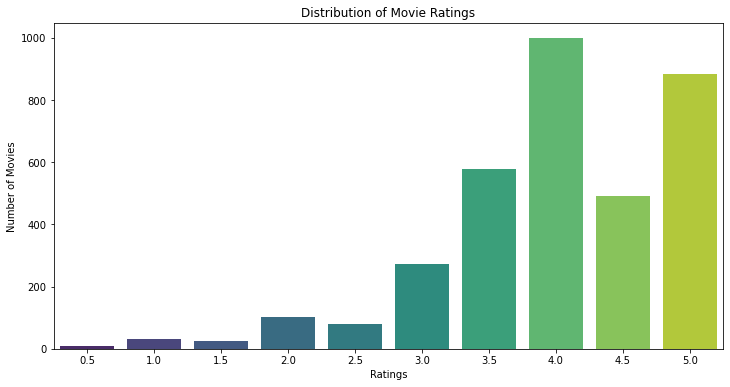

In [315]:

def plot_rating_distribution(data):
   
    # Count the number of movies for each rating
    rating_counts = data['Rating'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=0)
    plt.show()

# Example usage:
plot_rating_distribution(Movies_df)  # Display the rating distribution plot


On a scale of 0.5 to 5.0, the analysis shows that most movies received an average rating of 4.0, indicating that users generally rated the majority of films positively. This suggests a tendency for users to favorably evaluate the available content, with few movies receiving extremely low ratings of 0.5

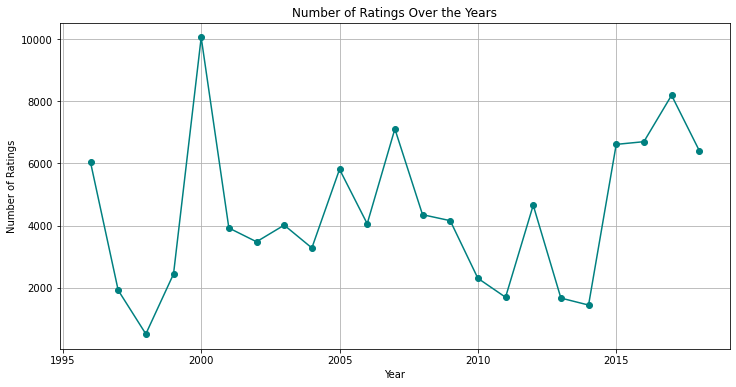

In [316]:

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
ratings_per_year = ratings.groupby('year')['rating'].count()

plt.figure(figsize=(12, 6))
ratings_per_year.plot(kind='line', marker='o', color='teal')
plt.title('Number of Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid()
plt.show()

There is a noticeable spike around the year 2000, where the number of ratings peaked at over 10,000.
This might imply that there was a surge in user activity, perhaps due to the popularity of certain movies or the increased availability of the platform at the time.

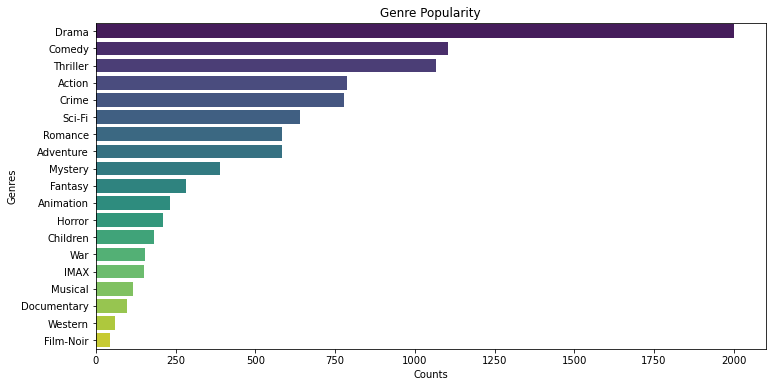

In [317]:
from collections import Counter
# Split genres and count the occurrences
genres_list = Movies_df['Genres'].str.split('|').sum()  # Split genres and flatten the list
genre_counts = Counter(genres_list)  # Count occurrences of each genre

# Sort the genre counts dictionary by values (counts) in descending order
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 6))
# Use a horizontal bar plot instead
sns.barplot(y=list(sorted_genre_counts.keys()), x=list(sorted_genre_counts.values()), palette='viridis')
plt.title('Genre Popularity')
plt.xlabel('Counts') 
plt.ylabel('Genres')  
plt.show()


* The gragh shows that the genres "Drama" and "Comedy" are the most popular among the movies in the dataset, with significantly higher counts compared to other genres.

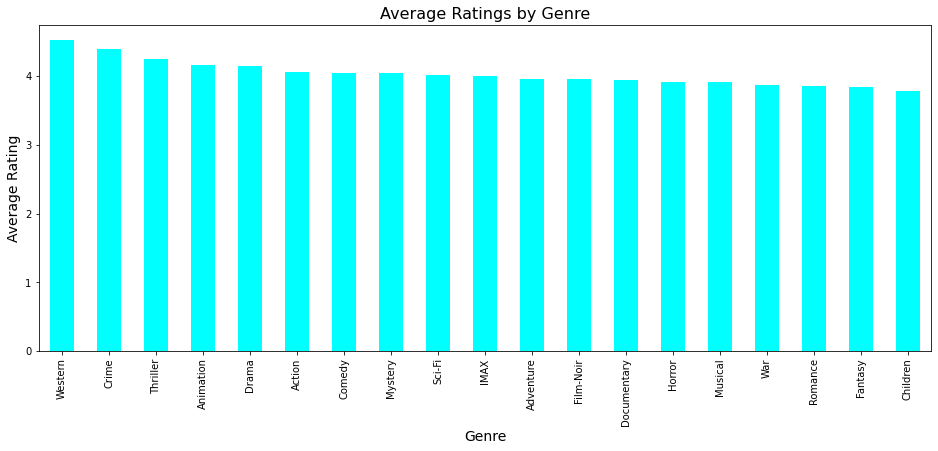

In [318]:
# Split genres and calculate average ratings for each genre
Movies_df['Genres_split'] = Movies_df['Genres'].str.split('|')
genres_ratings = Movies_df.explode('Genres_split').groupby('Genres_split')['Rating'].mean()

# Create a bar plot
plt.figure(figsize=(16, 6))
genres_ratings.sort_values(ascending=False).plot(kind='bar', color='cyan')
plt.title('Average Ratings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()


In [319]:
# Split the genres into a list
Movies_df['Genres_split'] = Movies_df['Genres'].str.split('|')

# Explode the DataFrame to count each genre
genre_counts = Movies_df.explode('Genres_split')['Genres_split'].value_counts()

# Print the genre counts
print(genre_counts)


Drama          2000
Comedy         1105
Thriller       1065
Action          788
Crime           779
Sci-Fi          641
Romance         585
Adventure       582
Mystery         388
Fantasy         283
Animation       231
Horror          209
Children        183
War             153
IMAX            152
Musical         117
Documentary      97
Western          59
Film-Noir        43
Name: Genres_split, dtype: int64


Despite the relatively lower number of Western movies produced, this genre stands out due to its impressive average ratings, surpassing those of other genres. This observation suggests that while Western films may not be as prolific as others, they resonate more strongly with audiences, gaining higher appreciation and positive feedback.

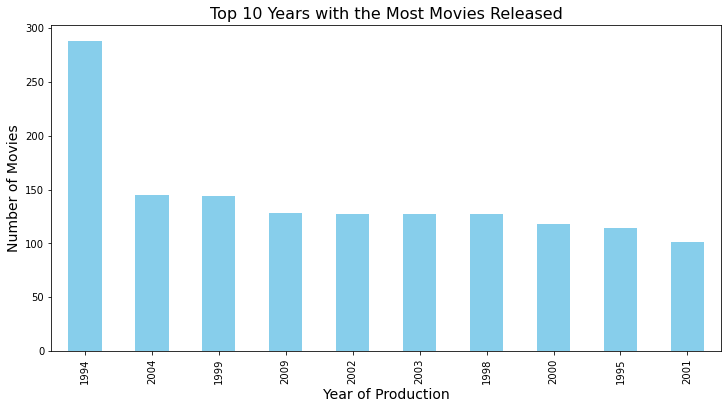

In [320]:
# Group the dataset by 'year_of_production' and count the number of movies released each year
movies_per_year = Movies_df['Year_of_production'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 years with the most movies released
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 Years with the Most Movies Released', fontsize=16)
plt.xlabel('Year of Production', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Display the plot
plt.show()


The analysis indicates that the majority of films were produced in 1994. One might expect this year to reflect the highest ratings. However, the ratings distribution graph reveals that 2000 actually had the highest number of ratings, despite a lower volume of films produced in that year compared to 1994.

# <font color=green><b>5.0 DATA PREPROCESSING</b></font> 


## <font color="#90EE90"><b>5.1 Creating a User-Item Matrix</b></font>

In [321]:
#step 1: creating a user-item matrix
user_item_matrix = Movies_df.pivot_table(index='Userid', columns='Title', values='Rating')

user_item_matrix.head()

Title,(500) Days of Summer,...And Justice for All,10 Cloverfield Lane,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"11'09""01 - September 11",12 Angry Men,13 Going on 30,2001: A Space Odyssey,...,Young Frankenstein,Z,Zack and Miri Make a Porno,Zelary,Zelig,Zero Dark Thirty,Zombieland,Zoolander,Zulu,eXistenZ
Userid,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color="#90EE90"><b>5.2 Handling Missing Values</b></font>

Since not every user will have rated every movie, the matrix will have many missing values. SVD can handle missing values implicitly by working only on the observed ratings, but for the our matrix, we want to fill in missing values with zeros

In [322]:
#Filling the missing values with 0
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.sample(n=5)

Title,(500) Days of Summer,...And Justice for All,10 Cloverfield Lane,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"11'09""01 - September 11",12 Angry Men,13 Going on 30,2001: A Space Odyssey,...,Young Frankenstein,Z,Zack and Miri Make a Porno,Zelary,Zelig,Zero Dark Thirty,Zombieland,Zoolander,Zulu,eXistenZ
Userid,,,,,,,,,,,,,,,,,,,,,
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## <font color="#90EE90"><b>5.3 Normalizing The Data</b></font>

For better performance of SVD, we will proceed and  normalize or mean-center the ratings by subtracting the user or movie average

In [323]:
user_ratings_mean = user_item_matrix.mean(axis=1)
user_item_matrix_normalized = user_item_matrix.sub(user_ratings_mean, axis=0)
user_item_matrix_normalized .head(3)

Title,(500) Days of Summer,...And Justice for All,10 Cloverfield Lane,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"11'09""01 - September 11",12 Angry Men,13 Going on 30,2001: A Space Odyssey,...,Young Frankenstein,Z,Zack and Miri Make a Porno,Zelary,Zelig,Zero Dark Thirty,Zombieland,Zoolander,Zulu,eXistenZ
Userid,,,,,,,,,,,,,,,,,,,,,
2,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,...,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316,-0.010316
7,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,...,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688,-0.000688
18,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,...,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289,-0.020289



## <font color="#90EE90"><b>5.4 Performing Singular Value Decomposition</b><font>

Now that we have a clean user-item matrix, we will apply SVD.

First, we will install scikit-surprise

In [324]:
# Installation of the suprise library:
%pip install scikit-surprise==1.1.1
print("Surprise library installed.")

Note: you may need to restart the kernel to use updated packages.
Surprise library installed.



# <font color=green><b>6.0 MODELLING</b></font> 

In this section, we will build a baseline recommendation model using the Surprise library, specifically applying Singular Value Decomposition (SVD) (Singular Value Decomposition) for collaborative filtering. Our goal is to create a robust model that predicts user ratings for movies based on historical data.

To evaluate the model's performance, we will utilize RMSE (Root Mean Squared Error) as our primary metric. Additionally, we will ensure that our predictions are rounded to the nearest 0.5-star increment to align with the rating scale used in the dataset.

## <font color="#90EE98"><b>6.1 KNNBasic Model</b><font>

KNNBasic is a traditional collaborative filtering approach, which relies on finding similarities between users or items based on real ratings. It uses the ratings provided by users for movies (or other items) and recommends new movies based on the similarity of users or item.

In [326]:
# Importing necessary libraries
from surprise import KNNBasic
from surprise import accuracy
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Loading data into Surprise format (you already have this)
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)

# Splitting data into train and test set (you already have this)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Defining the KNNBasic model
sim_options = {'name': 'cosine', 'user_based': False}  # item-based collaborative filtering
knn = KNNBasic(sim_options=sim_options)

# Training the KNN model
knn.fit(trainset)

# Predicting ratings for testset using KNN
knn_predictions = knn.test(testset)

# Calculating RMSE for KNN model
accuracy.rmse(knn_predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7574


0.7573895614086353


## <font color="#90EE90"><b>6.2 Singular Value Decomposition Model</b><font>

In [327]:
# Loading data into Surprise format
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(Movies_df[['Userid', 'Title', 'Rating']], reader)


# Splitting data into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


# Initializing and train SVD model
svd = SVD()
svd.fit(trainset)

# Predict ratings for testset
predictions = svd.test(testset)
# Importing library
from surprise import accuracy

# Calculating accuracy
accuracy.rmse(predictions)
 

RMSE: 0.5307


0.5307407111293858

KNNBasic higher RMSE, indicates that its predictions deviate more from the true user ratings compared to the SVD model which outperforms the KNNBasic model, as indicated by its lower RMSE (0.533 compared to 0.754).

Given the current RMSE scores, we would proceed and focus on tuning the SVD model. This model already has better predictive performance, and fine-tuning its hyperparameters (such as the number of factors, learning rate, regularization, etc.) could further reduce the RMSE and improve the recommendation

An RMSE of 0.582 suggests that, on average, our predicted ratings are relatively close to the actual ratings. While this isn't the optimal result, we'll move forward with hyperparameter tuning to improve the model's accuracy.


## <font color="#90EE90"><b>6.3 SVD Model Tunning</b><font>

For our model tunning, we will use the GridsearchCV to improve the perfomance of our model.

In [397]:
from surprise.model_selection import GridSearchCV
# Define Hyperparameter Grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.005, 0.01, 0.02]
}
# Perform GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Output the best score and parameters
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.4952036936905572
{'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.02}


The best RMSE score after tuning is 0.5084, which is an improvement from the previous RMSE of 0.5828. This indicates that the model now predicts user ratings with even higher accuracy after fine-tuning the hyperparameters.



# <font color=green><b>7.COLLABORATIVE FILTERING</b></font> 

Now that we have tunned our SVD model using GridSearchCV and obtained the best hyperparameters, the next step is to provide top 5 movie recommendations to a user, based on their ratings of other movies.
This will be achieved by the use of user_based filtration

### - User_Based Filtering

In [328]:
def round_to_nearest_half(value):
    """Round a float to the nearest 0.5."""
    return round(value * 2) / 2

def get_top_n_recommendations(user_id, model, data, n=5):
    """Get the top N movie recommendations for a specific user."""
    # Get the list of all unique movie titles
    all_movie_titles = Movies_df['Title'].unique()
    
    # Getting the list of movies the user has already rated
    user_rated_movies = Movies_df[Movies_df['Userid'] == user_id]['Title'].values
    
    # Finding the movies that the user hasn't rated yet
    unrated_movies = [movie for movie in all_movie_titles if movie not in user_rated_movies]
    
    # Predicting ratings for the unrated movies
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]
    
    # Sorting the predicted ratings in descending order
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Return the top N movie titles and their predicted ratings rounded to nearest 0.5
    return [(pred.iid, round_to_nearest_half(pred.est)) for pred in top_n_predictions]

# Ask the user to input their user ID
user_id = input("Please enter your User ID: ")

# Predicting the top 5 movies for the specified user
top_5_recommendations = get_top_n_recommendations(int(user_id), svd, Movies_df, n=5)

# Output the recommendations
print(f"\033[4mTop 5 movie recommendations for User {user_id}:\033[0m\n")
for movie, rating in top_5_recommendations:
    print(f"{movie}: Predicted Rating: {rating:.1f}\n")


Top 5 movie recommendations for User 145:

Talented Mr. Ripley, The: Predicted Rating: 4.5

X2: X-Men United: Predicted Rating: 4.5

Eternal Sunshine of the Spotless Mind: Predicted Rating: 4.5

Eraserhead: Predicted Rating: 4.5

Star Wars: Episode V - The Empire Strikes Back: Predicted Rating: 4.5



Using the user based filtration, we have implemented an input field that allows the entry of User ID, which generates the top 5 movie recommendations based on their ratings.

###  - Content_Based Filtering

Content-based filtering is a recommendation technique that suggests items to users based on the features or attributes of the items themselves, rather than relying on user interactions with items (like ratings). It uses item metadata, such as descriptions, genres, keywords, or other characteristics, to make recommendations

We will leverage the **scikit-learn** `TfidfVectorizer` function which converts text to feature vectors that is fed into an estimator.

In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine genres and tags as a single feature string for each movie
Movies_df['combined_features'] = Movies_df['Genres'] + ' ' + Movies_df['Tag']

# Use TF-IDF Vectorizer to convert combined features into a matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Movies_df['combined_features'])

In [330]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [331]:
def get_recommendations(movie_title, cosine_sim=cosine_sim):
    """Get recommendations based on a given movie title."""
    # Check if the movie title exists in the DataFrame
    if movie_title not in Movies_df['Title'].values:
        return f"Sorry, '{movie_title}' not found in the database. Please try another movie."

    # Get the index of the movie that matches the title
    idx = Movies_df[Movies_df['Title'] == movie_title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies, excluding the first one (which is the same movie)
    movie_indices = [i[0] for i in sim_scores[1:6]]  # Exclude the first one

    # Return the top 5 most similar movies
    return Movies_df['Title'].iloc[movie_indices].unique()  # Ensure uniqueness

# Allow user input for movie title
movie_title_input = input("Please enter a movie title: ")

# Get recommendations
recommendations = get_recommendations(movie_title_input)

# Output the recommendations

print(f"\033[4mYou might also like:\033[0m\n")
if isinstance(recommendations, str):
    print(recommendations)  # Print error message
else:
    for movie in recommendations:
        print(movie)


You might also like:

Pulp Fiction
Kiss Kiss Bang Bang
12 Angry Men
Social Network, The



## <font color="Green"><b>8. COLD START MITIGATION FOR NEW USER</b><font>

Cold start mitigation for new users is a critical challenge in recommendation systems, particularly in collaborative filtering methods, where the system relies heavily on user interactions and preferences to make suggestions: Here we will employ two stratges to adress this issue. There strategies are:-
- Content based Filtering for new users 
- Movie polularity 

 ### <font color="#90EE90"><b>8.1 Content_based filtering for </B>`new users`<font>

Content-based filtering for new users involves recommending movies based on the features of the movie themselves.

Since new users don’t have a history of rated movies, we are going to recommend movies based on their known preferences, in this case movie genre to recommend the best movies thes elected genre.

In [335]:
# Sample user preferences - genres to choose from
available_genres = [
    'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
    'Romance', 'Mystery', 'Thriller', 'Crime', 'Action',
    'Drama', 'War', 'Sci-Fi', 'Western', 'Horror',
    'Musical', 'Film-Noir', 'IMAX', 'Documentary'
]

# Ask the user to input their preferred genre
print("Available genres:")
for genre in available_genres:
    print(f"- {genre}")

user_genre = input("Please enter your preferred genre: ")

# Check if the input genre is valid
if user_genre in available_genres:
    # Filter the Movies_df based on the user-selected genre
    recommended_movies = Movies_df[Movies_df['Genres'].str.contains(user_genre)]
    
    # Sort the recommended movies by ratings in descending order
    recommended_movies_sorted = recommended_movies.sort_values(by='Rating', ascending=False)

    # Remove duplicates by keeping the first occurrence of each unique title
    recommended_movies_unique = recommended_movies_sorted.drop_duplicates(subset=['Title'])

    # Display the top 5 recommended unique movies
    print(f"\nTop movies in the '{user_genre}' genre:")
    print(recommended_movies_unique[['Title']].head(5))
      # print(recommended_movies_unique[['Title', 'Genres', 'Rating']].head(5))
else:
    print("Sorry, the genre you entered is not available. Please try again.")


Available genres:
- Adventure
- Animation
- Children
- Comedy
- Fantasy
- Romance
- Mystery
- Thriller
- Crime
- Action
- Drama
- War
- Sci-Fi
- Western
- Horror
- Musical
- Film-Noir
- IMAX
- Documentary

Top movies in the 'War' genre:
                                                  Title
344                                   Full Metal Jacket
240                                        Forrest Gump
1061  Dr. Strangelove or: How I Learned to Stop Worr...
3131                        Come and See (Idi i smotri)
252                                    Schindler's List



 ### <font color="#90EE90"><b>8.2Movie Popularity</b> `new users`<font>

Another approach to tackle the cold start problem for new users is to recommend the highest-rated movies regardless of genre. 

Since new users lack interaction history, suggesting highly-rated or popular films guarantees that they receive quality recommendations immediately, thereby enhancing user acquisition and retention

In [404]:
# movie ratings and their average rating
popular_movies = Movies_df.groupby('Title').agg({'Rating': 'mean'}).reset_index()
popular_movies = popular_movies.sort_values(by='Rating', ascending=False)

# Get the top 5 popular movies
top_n_popular = popular_movies.head(5)

# Display the popular movies
print(top_n_popular)


                                     Title  Rating
0                     (500) Days of Summer     5.0
304                       Dead Man Walking     5.0
254            Come and See (Idi i smotri)     5.0
1182  South Park: Bigger, Longer and Uncut     5.0
1180                   Sound of Music, The     5.0



By implementing the hybrid model, we successfully addressed the cold start problem for new users by recommending popular movies and leveraging content-based filtering to provide personalized suggestions based on their preferences.


# <font color="Green"><b>9 CONCLUSIONS</b><font>

### 1.Personalized Top 5 Movie Recommendations.
The implementation of collaborative filtering  using the user based filtration techniques successfully provides personalized recommendations, enhancing user engagement and satisfaction. Users receive tailored movie suggestions based on their ratings, leading to increased interaction with the platform.

### 2. Content based filteration for existing users .
Employment of the content-based filtering system for existing users, allows them to enter a specific movie title. Upon entering the title, the system suggests similar movies based on the selected movie's attributes

### 3. Cold Start Problem Mitigation
- Movie Popularity:
For new users who lack interaction history, the system recommends the highest-rated regardless of genre. This approach ensures that users are introduced to quality content right from their first interaction.

- Content-Based Genre Recommendations:
 In addition to popularity-based recommendations, we have integrated a content-based filtering mechanism that allows new users to select their preferred movie genre. Once a genre is selected, the system suggests the highest-rated movies within that category. This method not only personalizes the recommendations based on user interests but also facilitates a more targeted exploration of films that align with their tastes.

 ### 4. Evaluation of the model.
To assess the performance of our recommendation system, we employed the Root Mean Square Error (RMSE).
After implementing improvements to the best perfoming model,(which in our case is the SVD) through hyperparameter tuning with GridSearchCV, we achieved an RMSE of 0.50. This indicates that, on average, our model's predictions are within 0.50 rating points of the actual user ratings.

### 5. Movie Rating Frequency
The analysis reveals that, on average, movies from the MovieLens dataset received a rating of 4.0 on a scale ranging from 0.5 to 5.0

# <font color="Green"><b>10.RECOMENDATION</b><font>

- The film industry is dynamic, with new releases reflecting changing audience preferences, cultural trends, and technological advancements. By including the latest movies, the dataset remains relevant and up-to-date, ensuring users have access to current content that aligns with contemporary tastes.

- Enrich the existing movie data with comprehensive information about the filmmakers. Specifically, including details about the authors (screenwriters) and producers of each film can greatly enhance the dataset's value for users and improve the recommendation system's effectiveness.By analyzing the works of specific authors and producers, the recommendation system can suggest similar films created by the same talent.

- By broadening genre classifications to include niche and diverse categories, MovieLens can create a more inclusive and engaging platform that appeals to a wider range of viewers. This strategy not only enhances user satisfaction but also promotes exploration and discovery, ultimately enriching the overall cinematic experience for all users.

- leveraging user location data to enhance movie recommendations, specifically to address the cold start problem. For instance, if a movie is popular in a particular area, such as Kenya,it can be recommended to new users from the same location.

- Integration with External Data Sources: Expanding data sources by integrating external datasets, such as movie reviews, social media sentiment analysis, or movie industry trends. This additional data can provide valuable insights into the popularity and sentiment surrounding movies, enhancing the quality and relevance of recommendations.

-----------------------------------------------------------------------------------------------------------------------------------------------------------